In [42]:
import numpy as np

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv(r'C:\Users\yashk\Dropbox\PC\Downloads\Proj\data\spam.csv', encoding='ISO-8859-1')

In [45]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
19,spam,England v Macedonia - dont miss the goals/team...,NaN,NaN,NaN
2092,ham,"Oh, my love, it's soooo good to hear from you....",NaN,NaN,NaN
4423,ham,Update your face book status frequently :),NaN,NaN,NaN
719,ham,Macha dont feel upset.i can assume your mindse...,NaN,NaN,NaN
1819,ham,Dunno dat's wat he told me. Ok lor...,NaN,NaN,NaN


## 1. Data Cleaning


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [47]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [48]:
df.sample(5)

,v1,v2
384,spam,Double mins and txts 4 6months FREE Bluetooth ...
4729,ham,I dont know ask to my brother. Nothing problem...
1234,ham,\Hello-/@drivby-:0quit edrunk sorry iff pthis ...
929,spam,money!!! you r a lucky winner ! 2 claim your p...
3073,ham,Don know. I did't msg him recently.


In [49]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [51]:
df['target']=encoder.fit_transform(df['target'])

In [52]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [54]:
df.duplicated().sum()

np.int64(403)

In [55]:
df=df.drop_duplicates(keep='first')

In [56]:
df.duplicated().sum()

np.int64(0)

## 2.EDA


In [57]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [58]:
import matplotlib.pyplot as plt

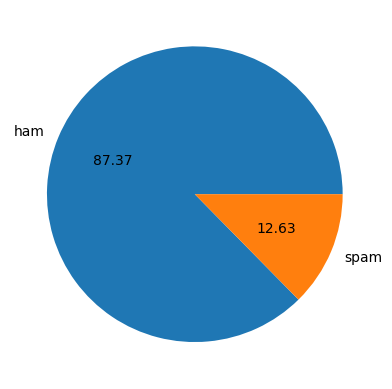

In [59]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [60]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [61]:
import nltk

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
df['num_characters']=df['text'].apply(len)

In [64]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [65]:
nltk.download('punkt_tab')
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [66]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [67]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [69]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [71]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [72]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

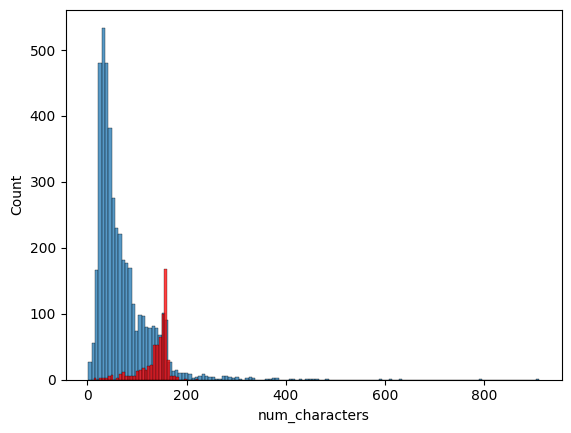

In [73]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

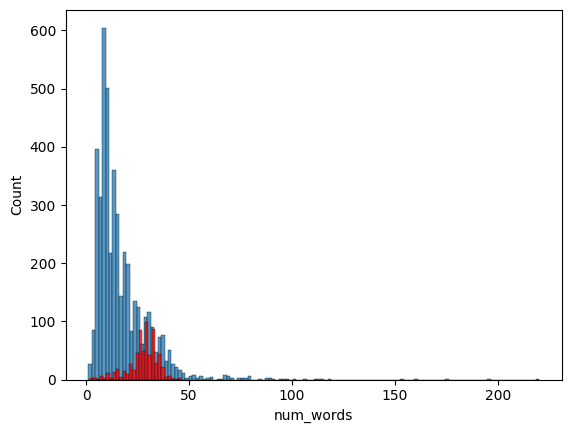

In [74]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

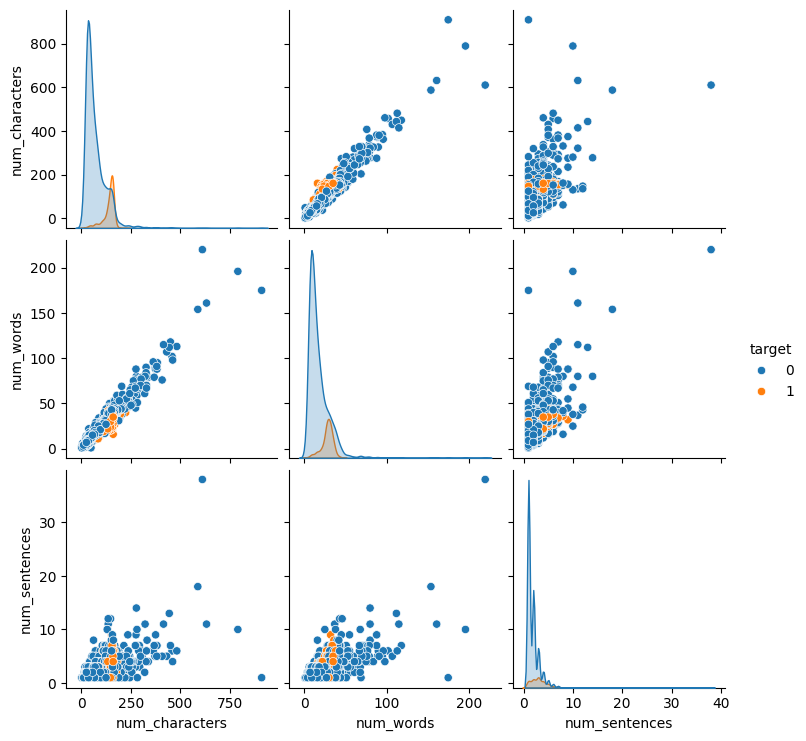

In [75]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing


In [84]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [85]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [87]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    y = []
    text = text.lower().split()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

# Test
print(transform_text("I loved YT Channel lectures on MAchine Learning Hi How Are YOU Parth"))


i love yt channel lectur on machin learn hi how are you parth


In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transform_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

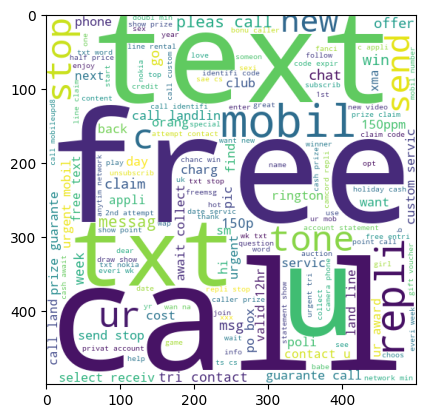

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

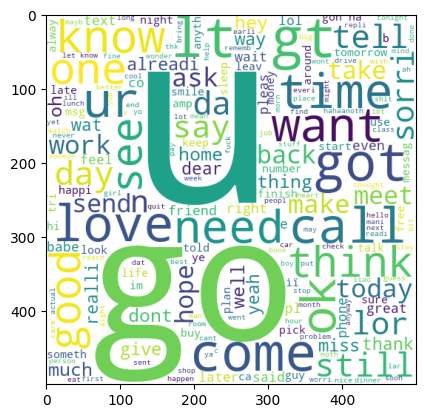

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

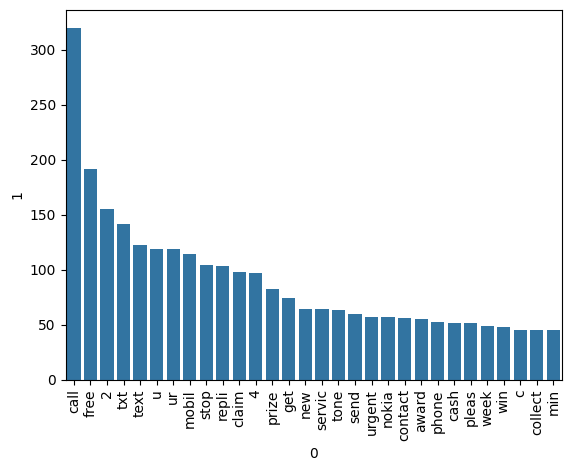

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

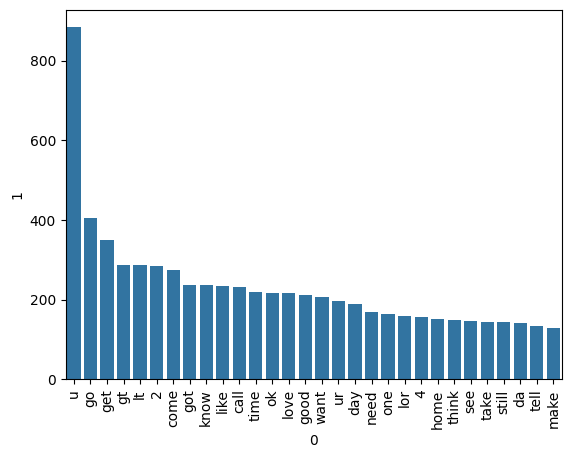

In [ ]:

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [40]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))